In [2]:
!pip install python-chess
!pip install tensorflow

import chess
import numpy as np

def one_hot_encode_piece(piece):
    pieces = list('rnbqkpRNBQKP.')
    arr = np.zeros(len(pieces))
    piece_to_index = {p: i for i, p in enumerate(pieces)}
    index = piece_to_index[piece]
    arr[index] = 1
    return arr

def encode_board(board):
    board_str = str(board)
    board_str = board_str.replace(' ', '')
    board_list = []
    for row in board_str.split('\n'):
        row_list = []
        for piece in row:
            row_list.append(one_hot_encode_piece(piece))
        board_list.append(row_list)
    return np.array(board_list)

import pandas as pd

train_df = pd.read_csv('/kaggle/input/train-chess/train.csv', index_col='id')

val_df = train_df[-10000:]
train_df.head()

import numpy as np
def encode_fen_string(fen_str):
    board = chess.Board(fen=fen_str)
    return encode_board(board)

X_train = np.stack(train_df['board'].apply(encode_fen_string))
y_train = train_df['black_score']

X_val = np.stack(val_df['board'].apply(encode_fen_string))
y_val = val_df['black_score']

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential([
    Flatten(),
    Dense(1024, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1),
])

model.compile(
    optimizer='rmsprop',
    loss='mean_squared_error')

model

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.1 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 18.5 MB/s eta 0:00:0000:010:01
  Attempting uninstall: keras
    Found existing installation: keras 3.3.3
    Uninstalling keras-3.3.3:
      Successfully uninstalled keras-3.3.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.


2024-06-24 18:04:24.939505: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-24 18:04:24.939654: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-24 18:04:25.132567: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Epoch 1/50
1838/1838 [==============================] - 20s 11ms/step - loss: 133982.1562 - val_loss: 119987.5547
Epoch 2/50
1838/1838 [==============================] - 19s 11ms/step - loss: 106497.5938 - val_loss: 129084.3281
Epoch 3/50
1838/1838 [==============================] - 19s 10ms/step - loss: 88507.4141 - val_loss: 80485.3203
Epoch 4/50
1838/1838 [==============================] - 19s 10ms/step - loss: 73332.6953 - val_loss: 66522.3281
Epoch 5/50
1838/1838 [==============================] - 19s 11ms/step - loss: 63155.5312 - val_loss: 57802.3789
Epoch 6/50
1838/1838 [==============================] - 18s 10ms/step - loss: 56301.8984 - val_loss: 64140.2930
Epoch 7/50
1838/1838 [==============================] - 19s 10ms/step - loss: 51021.3242 - val_loss: 48056.1445
Epoch 8/50
1838/1838 [==============================] - 19s 10ms/step - loss: 47158.5898 - val_loss: 54761.2617
Epoch 9/50
1838/1838 [==============================] - 19s 10ms/step - loss: 43830.8398 - val_loss:

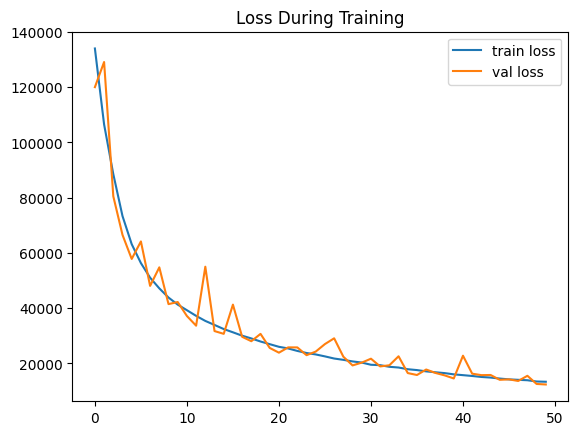

In [3]:
history = model.fit(
    X_train,
    y_train,
    epochs=50,
    validation_data=(X_val, y_val))

import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.title('Loss During Training')
plt.show()

In [5]:
model.save_weights('/kaggle/working/AlephZero-v2-TF-CKPT')